In [11]:
import pandas as pd 
import numpy as np 
import warnings

df = pd.read_csv('statement22cbb58a08c6246f059fa445a119f6b5.csv')
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
df['Close Date'] = pd.to_datetime(df['Close Date'])
start_date = pd.to_datetime("2025-03-13")
end_date = pd.to_datetime("2025-03-23")
df_filtered = df[~((df['Close Date'] >= start_date) & (df['Close Date'] <= end_date))]
df_filtered

,Tags,Ticket,Open Date,Close Date,Symbol,Action,Units/Lots,SL,TP,Open Price,Close Price,Commission,Swap,Pips,Profit,Gain,Comment,Magic Number,Duration (DD:HH:MM:SS),Profitable(%),Profitable(time duration),Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
0,NaN,65989659,06/12/2025 19:01,2025-06-12 19:06:00,XAUUSD,Buy,0.3,0.0,3389.93,3385.68,3387.83,0.0,0.0,215.0,55.73,0.03,NaN,0,00:00:04:51,100.0,4m,0.0,0.00,215.0,55.9,0.0,0.00,100.0,100.0,0.0,0.00
1,NaN,65988368,06/12/2025 18:55,2025-06-12 19:06:00,XAUUSD,Buy,0.3,0.0,3390.10,3389.26,3387.82,0.0,0.0,-144.0,-37.32,-0.02,NaN,0,00:00:11:07,0.0,0s,405.0,416.67,0.0,0.0,-405.0,-105.30,0.0,64.4,-144.0,-37.44
2,NaN,65952562,06/12/2025 16:44,2025-06-12 16:45:00,XAUUSD,Sell,0.3,0.0,3394.58,3398.37,3396.44,0.0,0.0,193.0,49.91,0.03,NaN,0,00:00:01:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,65951640,06/12/2025 16:42,2025-06-12 16:45:00,XAUUSD,Sell,0.3,0.0,3394.53,3396.20,3396.59,0.0,0.0,-39.0,-10.09,-0.01,NaN,0,00:00:03:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,65948054,06/12/2025 16:34,2025-06-12 16:38:00,XAUUSD,Sell,0.3,0.0,3389.60,3387.44,3390.32,0.0,0.0,-288.0,-74.50,-0.04,NaN,0,00:00:04:25,0.0,0s,556.0,588.24,0.0,0.0,-556.0,-144.56,0.0,48.2,-288.0,-74.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,NaN,14061624,08/01/2024 21:10,2024-08-01 21:11:00,BTCUSD,Buy,0.1,0.0,0.00,62906.00,62961.00,0.0,0.0,55.0,5.06,0.01,NaN,0,00:00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4981,NaN,14061622,08/01/2024 21:10,2024-08-01 21:10:00,BTCUSD,Buy,0.1,0.0,63013.33,62907.00,62988.00,0.0,0.0,81.0,7.50,0.01,NaN,0,00:00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4982,NaN,14055994,08/01/2024 20:24,2024-08-01 20:27:00,NAS100,Buy,1.0,0.0,19011.47,18999.00,19003.00,0.0,0.0,4.0,4.39,0.00,NaN,0,00:00:03:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4983,NaN,14055992,08/01/2024 20:24,2024-08-01 20:27:00,NAS100,Buy,1.0,0.0,0.00,18996.00,19003.00,0.0,0.0,7.0,5.68,0.01,NaN,0,00:00:03:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_filtered.loc[:,'Open Date'] = pd.to_datetime(df_filtered['Open Date'])
returns = df_filtered.groupby(pd.Grouper(key = 'Open Date', freq='D'))['Gain'].sum().div(100)
sharpe_ratio = (returns.mean() / returns.std())*np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 10.59


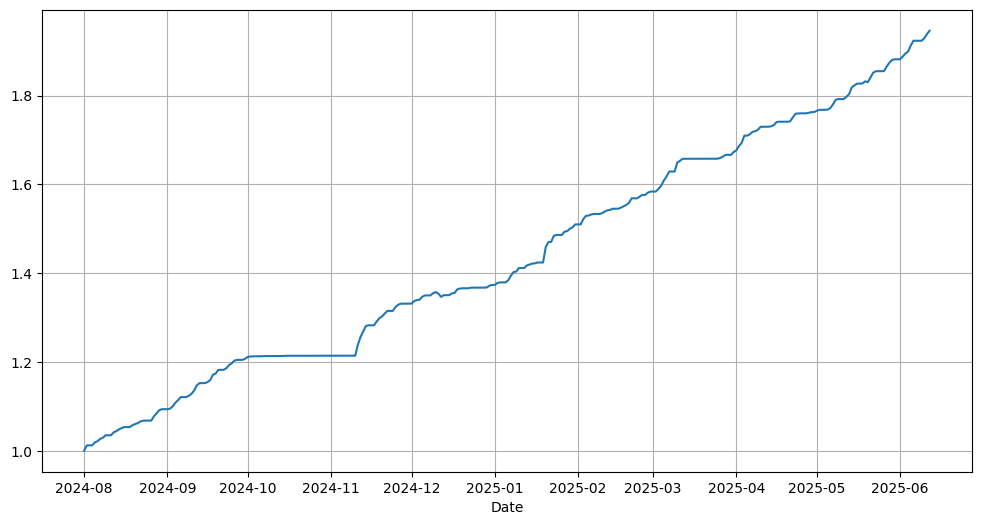

In [19]:
import matplotlib.pyplot as plt

#Cumulative Product
cumulative = (1 + returns).cumprod()

plt.figure(figsize=(12,6))
plt.plot(cumulative, label = "Cumulative Product")
plt.xlabel("Date")
plt.grid(True)
plt.show()

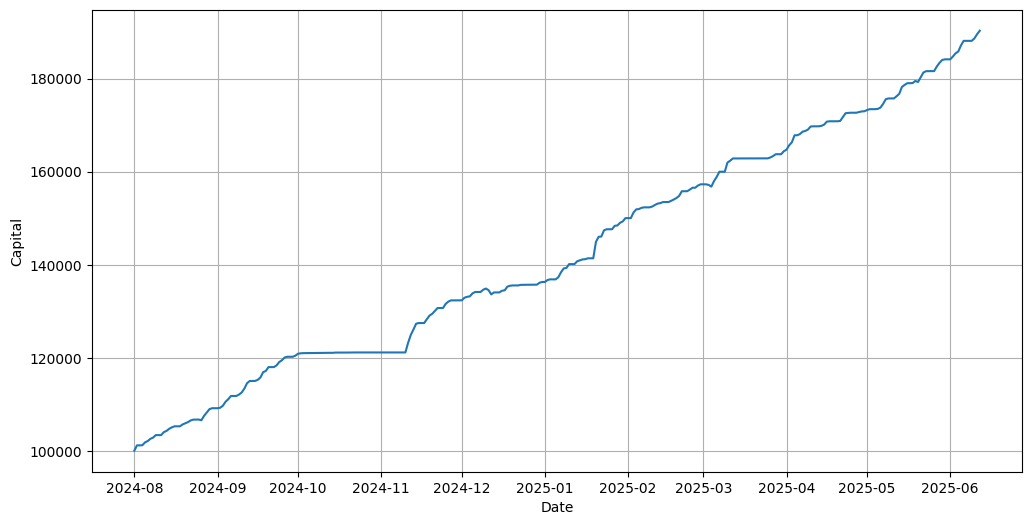

In [31]:
#Portfolio
profit = df_filtered.groupby(pd.Grouper(key='Open Date', freq='D'))['Profit'].sum()
value = profit.cumsum()

portfolio_value = value

plt.figure(figsize=(12,6))
plt.plot(portfolio_value, label='Capital')
plt.xlabel("Date")
plt.ylabel("Capital")
plt.grid(True)
plt.show()